# Load Data

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_gen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.15,
        rescale=1./255,
        horizontal_flip=True,
        validation_split=0.2)

In [40]:
#train: 80% of "Validation"
train_dir = "C:/Users/zhuyi/Documents/ANLY590_DEEP/project/Validation"
train = data_gen.flow_from_directory(directory=train_dir,target_size=(160,160),
                                          class_mode="categorical",
                                          batch_size=32,subset = "training",seed=100)

Found 640 images belonging to 2 classes.


In [41]:
#valid: 20% of "Validation"
valid = data_gen.flow_from_directory(directory=train_dir,target_size=(160,160),
                                          class_mode="categorical",
                                          batch_size=32,subset="validation",seed=100)

Found 160 images belonging to 2 classes.


In [45]:
#test: "sample_training"
test_dir = "C:/Users/zhuyi/Documents/ANLY590_DEEP/project/sample_training"
test = data_gen.flow_from_directory(directory=test_dir,target_size=(160,160),
                                          class_mode="categorical",
                                          batch_size=32)

Found 100 images belonging to 2 classes.


# CNN with 1 Convolutional Layer

In [46]:
model_one_layer = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(160, 160, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_one_layer.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [47]:
checkpoint = ModelCheckpoint("CNN_1_checkpoint.h5",monitor="val_accuracy",save_best_only=True,verbose=1)

In [48]:
history_one_layer = model_one_layer.fit_generator(generator=train, 
                              validation_data=valid,
                              callbacks=[checkpoint],
                              epochs=10)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 2.8492 - accuracy: 0.7000
Epoch 00001: val_accuracy improved from -inf to 0.86250, saving model to CNN_1_checkpoint.h5
20/20 [==============================] - 50s 2s/step - loss: 2.8492 - accuracy: 0.7000 - val_loss: 0.3703 - val_accuracy: 0.8625
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.2823 - accuracy: 0.8891
Epoch 00002: val_accuracy improved from 0.86250 to 0.92500, saving model to CNN_1_checkpoint.h5
20/20 [==============================] - 50s 2s/step - loss: 0.2823 - accuracy: 0.8891 - val_loss: 0.2127 - val_accuracy: 0.9250
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.1929 - accuracy: 0.9312
Epoch 00003: val_accuracy improved from 0.92500 to 0.94375, saving model to CNN_1_checkpoint.h5
20/20 [==============================] - 51s 3s/step - loss: 0.1929 - accuracy: 0.9312 - val_loss: 0.1724 - val_accuracy: 0.9438
Epoch 4/10
20/20 [============================

### Evaluation: 1 layer

In [49]:
model_one_layer.evaluate(train)

20/20 [==============================] - 16s 797ms/step - loss: 0.1048 - accuracy: 0.9672


[0.10484705865383148, 0.9671875238418579]

In [50]:
model_one_layer.evaluate(test)

4/4 [==============================] - 2s 616ms/step - loss: 0.1319 - accuracy: 0.9500


[0.13186079263687134, 0.949999988079071]

In [51]:
model_one_layer.evaluate(valid)

5/5 [==============================] - 3s 640ms/step - loss: 0.1423 - accuracy: 0.9500


[0.1422692835330963, 0.949999988079071]

In [52]:
df_loss_accuary = pd.DataFrame.from_dict(history_one_layer.history).drop(columns = ['val_loss', 'val_accuracy'])
df_loss_accuary

,loss,accuracy
0,2.849223,0.700000
1,0.282260,0.889063
2,0.192898,0.931250
3,0.160436,0.939062
4,0.118835,0.956250
5,0.133714,0.951563
6,0.151620,0.951563
7,0.118682,0.959375
8,0.105924,0.967188
9,0.105242,0.964063


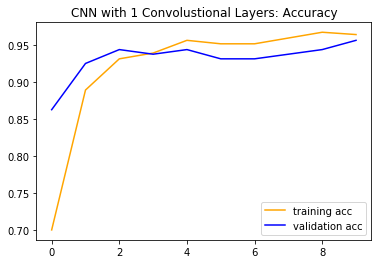

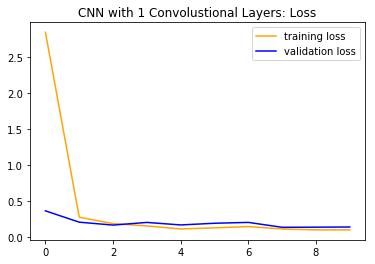

In [53]:
acc = history_one_layer.history['accuracy']
val_acc = history_one_layer.history['val_accuracy']
loss = history_one_layer.history['loss']
val_loss = history_one_layer.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('CNN with 1 Convolustional Layers: Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('CNN with 1 Convolustional Layers: Loss')
plt.legend()
plt.show()

In [54]:
model_one_layer.save(os.path.join("C:/Users/zhuyi/Documents/ANLY590_DEEP/project",'CNN_single_layer.h5'))

# CNN with 4 Convolutional Layers

In [55]:
model_four_layer = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(160, 160, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_four_layer.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [56]:
checkpoint = ModelCheckpoint("CNN_4_checkpoint.h5",monitor="val_accuracy",save_best_only=True,verbose=1)

In [57]:
history_four_layer = model_four_layer.fit_generator(generator=train, 
                              validation_data=valid,
                              callbacks=[checkpoint],
                              epochs=10)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.6812
Epoch 00001: val_accuracy improved from -inf to 0.90000, saving model to CNN_4_checkpoint.h5
20/20 [==============================] - 81s 4s/step - loss: 0.5696 - accuracy: 0.6812 - val_loss: 0.2849 - val_accuracy: 0.9000
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.2692 - accuracy: 0.9016
Epoch 00002: val_accuracy did not improve from 0.90000
20/20 [==============================] - 81s 4s/step - loss: 0.2692 - accuracy: 0.9016 - val_loss: 0.2707 - val_accuracy: 0.9000
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.2491 - accuracy: 0.9094
Epoch 00003: val_accuracy improved from 0.90000 to 0.94375, saving model to CNN_4_checkpoint.h5
20/20 [==============================] - 80s 4s/step - loss: 0.2491 - accuracy: 0.9094 - val_loss: 0.1527 - val_accuracy: 0.9438
Epoch 4/10
20/20 [==============================] - ETA: 0s - loss: 0.2069 - accuracy: 

### Evaluation: 4 layer

In [58]:
model_four_layer.evaluate(train)

20/20 [==============================] - 25s 1s/step - loss: 0.1282 - accuracy: 0.9625


[0.12819644808769226, 0.9624999761581421]

In [59]:
model_four_layer.evaluate(test)

4/4 [==============================] - 3s 657ms/step - loss: 0.1871 - accuracy: 0.9400


[0.18706069886684418, 0.9399999976158142]

In [60]:
model_four_layer.evaluate(valid)

5/5 [==============================] - 5s 1s/step - loss: 0.1382 - accuracy: 0.9563


[0.13815101981163025, 0.956250011920929]

In [61]:
df_loss_accuary = pd.DataFrame.from_dict(history_four_layer.history).drop(columns = ['val_loss', 'val_accuracy'])
df_loss_accuary

,loss,accuracy
0,0.569555,0.681250
1,0.269150,0.901563
2,0.249102,0.909375
3,0.206915,0.926562
4,0.179096,0.940625
5,0.155132,0.951563
6,0.156218,0.953125
7,0.187243,0.925000
8,0.192268,0.940625
9,0.166434,0.948438


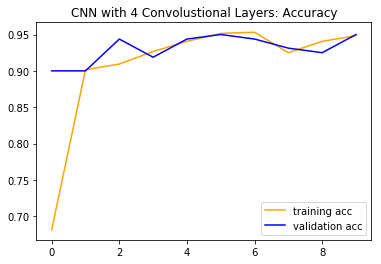

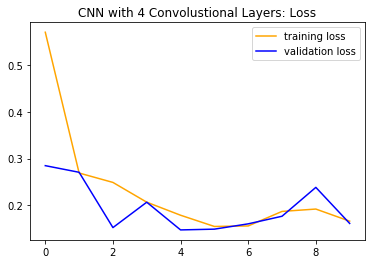

In [62]:
acc = history_four_layer.history['accuracy']
val_acc = history_four_layer.history['val_accuracy']
loss = history_four_layer.history['loss']
val_loss = history_four_layer.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('CNN with 4 Convolustional Layers: Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('CNN with 4 Convolustional Layers: Loss')
plt.legend()
plt.show()

In [63]:
model_four_layer.save(os.path.join("C:/Users/zhuyi/Documents/ANLY590_DEEP/project",'CNN_four_layer.h5'))